In [12]:
import pandas as pd

file_path = "combined_dataset.csv" 
dataset = pd.read_csv(file_path)
sorted_dataset = dataset.sort_values(by="Language")
sorted_dataset.to_csv("sorted_combined_dataset.csv", index=False)
print(sorted_dataset.head())


                                                    Text Language
15635  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   Arabic
9468   كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   Arabic
9467   مجرد التفكير في تلك الأم المسكينة النرجسية كان...   Arabic
9466   لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   Arabic
9465   وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   Arabic


In [13]:
import pandas as pd
data = pd.read_csv("sorted_combined_dataset.csv")

# Basic Info
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Sample Data": data.head()
}

data_info


{'Shape': (32337, 2),
 'Columns': ['Text', 'Language'],
 'Data Types': {'Text': dtype('O'), 'Language': dtype('O')},
 'Missing Values': {'Text': 0, 'Language': 0},
 'Sample Data':                                                 Text Language
 0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   Arabic
 1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   Arabic
 2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...   Arabic
 3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   Arabic
 4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   Arabic}

Dataset Shape: (32337, 2)

Columns:
 Index(['Text', 'Language'], dtype='object')

Data Types:
 Text        object
Language    object
dtype: object

Missing Values:
 Text        0
Language    0
dtype: int64

Sample Data:
                                                 Text Language
0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   Arabic
1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   Arabic
2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...   Arabic
3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   Arabic
4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   Arabic

Language Distribution:
Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Persian       1000
Thai          1000
Swedish       1000
Romanian      1000
Pushto        1000
Portugese     1000
Latin         1000
Chinese       1000
Korean        1000
Japanese      1000
Indonesian   

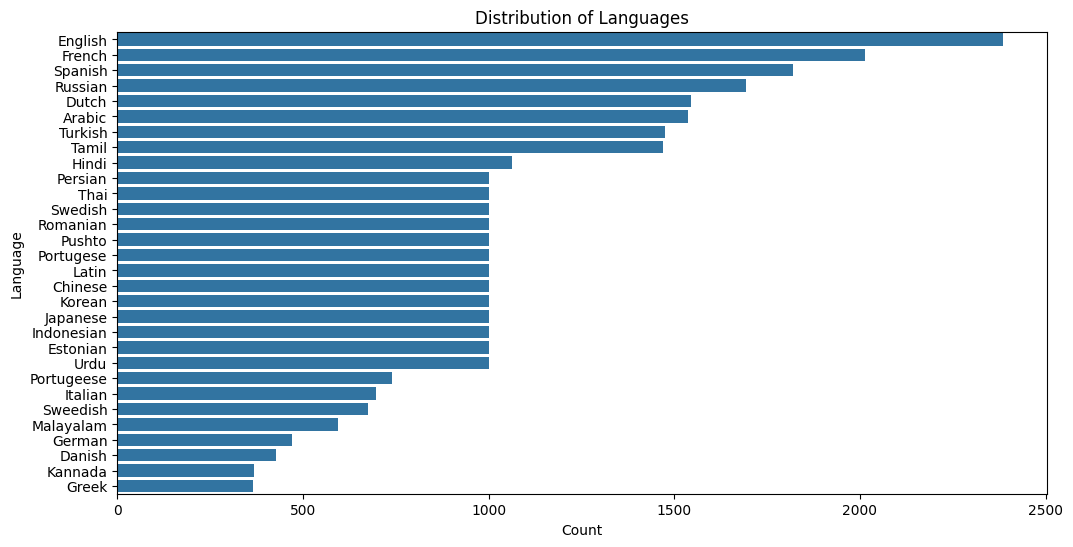


Text Length Statistics:
count    32337.000000
mean       281.788880
std        266.998761
min          1.000000
25%        141.000000
50%        211.000000
75%        355.000000
max      19284.000000
Name: text_length, dtype: float64


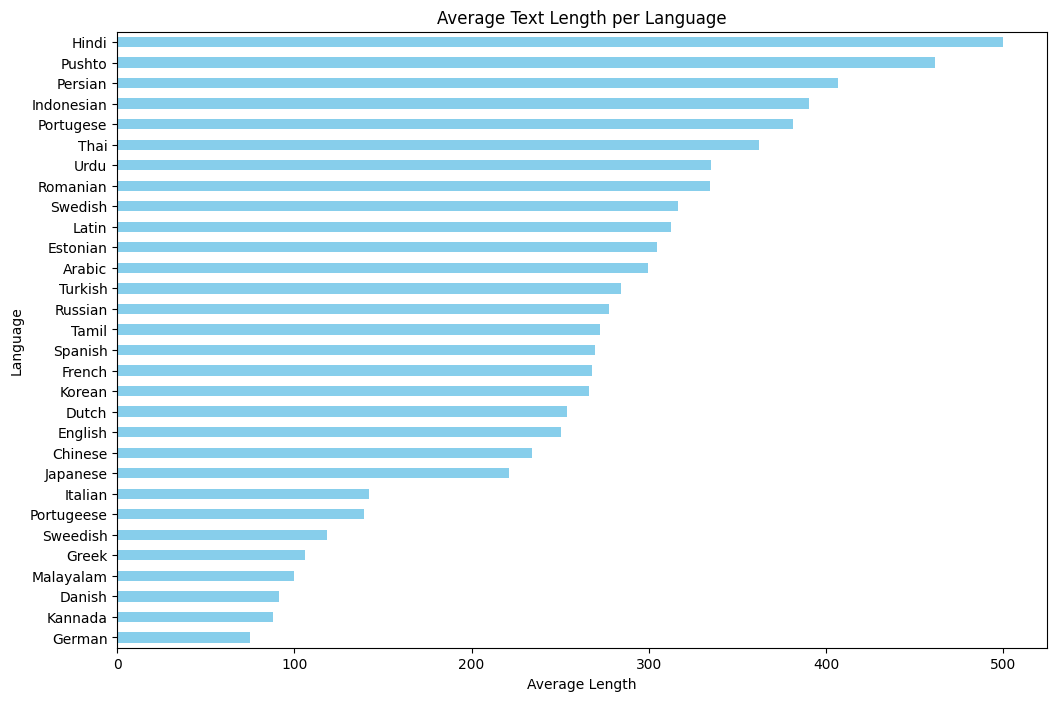

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\padme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Unique Words Statistics:
count    32337.000000
mean        26.259393
std         26.602668
min          0.000000
25%          5.000000
50%         20.000000
75%         37.000000
max        261.000000
Name: unique_words, dtype: float64


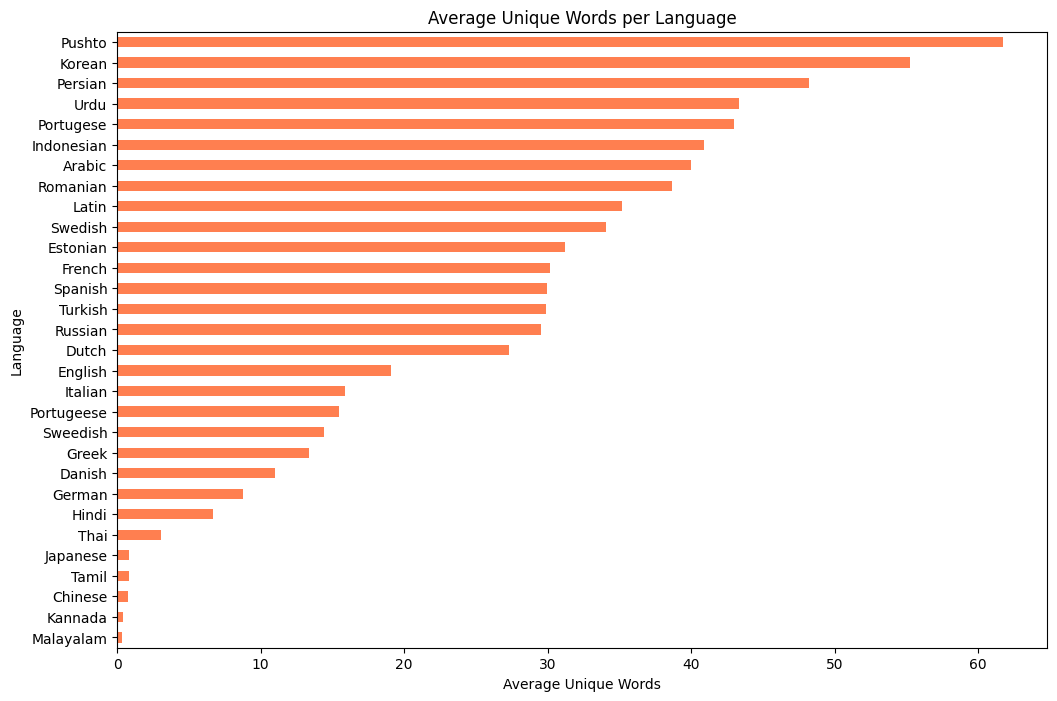

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("sorted_combined_dataset.csv")

print("Dataset Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nSample Data:\n", data.head())

# class distribution
if "Language" in data.columns:
    print("\nLanguage Distribution:")
    print(data["Language"].value_counts())
    
    # Plot language distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, y="Language", order=data["Language"].value_counts().index)
    plt.title("Distribution of Languages")
    plt.xlabel("Count")
    plt.ylabel("Language")
    plt.show()

# Analyze text lengths
if "Text" in data.columns:
    data["text_length"] = data["Text"].str.len()
    print("\nText Length Statistics:")
    print(data["text_length"].describe())

    # Text length
    if "Language" in data.columns:
        avg_length_per_language = data.groupby("Language")["text_length"].mean().sort_values()
        avg_length_per_language.plot(kind="barh", figsize=(12, 8), color="skyblue")
        plt.title("Average Text Length per Language")
        plt.xlabel("Average Length")
        plt.ylabel("Language")
        plt.show()

from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def extract_unique_words(text):
    words = text.lower().split()
    return [word for word in words if word.isalpha() and word not in stop_words]

if "Text" in data.columns:
    data["unique_words"] = data["Text"].apply(lambda x: len(set(extract_unique_words(x))))
    print("\nUnique Words Statistics:")
    print(data["unique_words"].describe())
    
    # unique word per language
    if "Language" in data.columns:
        avg_unique_words = data.groupby("Language")["unique_words"].mean().sort_values()
        avg_unique_words.plot(kind="barh", figsize=(12, 8), color="coral")
        plt.title("Average Unique Words per Language")
        plt.xlabel("Average Unique Words")
        plt.ylabel("Language")
        plt.show()



In [9]:
import pandas as pd
import re

data = pd.read_csv("sorted_combined_dataset.csv")
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

def clean_text(text):
    text = re.sub(r'[!@#$%^&*(),.?":{}|<>~0-9\[\]]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['Cleaned_Text'] = data['Text'].apply(lambda x: clean_text(x).lower())

data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Sample Data": data[['Text', 'Cleaned_Text']].head()
}

data_info


{'Shape': (32125, 3),
 'Columns': ['Text', 'Language', 'Cleaned_Text'],
 'Missing Values': {'Text': 0, 'Language': 0, 'Cleaned_Text': 0},
 'Sample Data':                                                 Text  \
 0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   
 1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   
 2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...   
 3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   
 4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   
 
                                         Cleaned_Text  
 0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...  
 1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...  
 2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...  
 3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...  
 4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...  }

In [11]:
cleaned_text_file_path = "cleaned_text_with_language.csv"
data[['Cleaned_Text', 'Language']].to_csv(cleaned_text_file_path, index=False, encoding='utf-8')

print(f"Cleaned text with language has been saved to '{cleaned_text_file_path}'")



Cleaned text with language has been saved to 'cleaned_text_with_language.csv'


In [13]:
import pandas as pd
file_path = 'cleaned_text_no_nulls.csv'
df = pd.read_csv(file_path)
print(df['Cleaned_Text'].isnull().sum())

0


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import save_npz

tfidf_vectorizer = TfidfVectorizer()

#sparse matrix
tfidf_features = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

# Save the sparse matrix
sparse_matrix_path_tfidf = 'tfidf_sparse_matrix_full.npz'
save_npz(sparse_matrix_path_tfidf, tfidf_features)

print(f"TF-IDF sparse matrix (full features) saved to: {sparse_matrix_path_tfidf}")

TF-IDF sparse matrix (full features) saved to: tfidf_sparse_matrix_full.npz


In [30]:
# Get the feature names (vocabulary)
vocabulary_tfidf = tfidf_vectorizer.get_feature_names_out()

print(f"Vocabulary size (TF-IDF): {len(vocabulary_tfidf)}")
print(f"Sample vocabulary: {vocabulary_tfidf[:10]}")

Vocabulary size (TF-IDF): 299171
Sample vocabulary: ['aa' 'aaa' 'aabdel' 'aac' 'aadlikeks' 'aadlimarssal' 'aadlimatriklisse'
 'aadliseisuse' 'aadliseisusesse' 'aadlisoost']


In [31]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

file_path = 'cleaned_text_with_language_corrected.csv'
df = pd.read_csv(file_path)
print("Unique Languages:", df['Language'].unique())

label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Language'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:")
for language, encoded in label_mapping.items():
    print(f"{language}: {encoded}")

encoded_dataset_path = 'cleaned_text_with_encoded_labels.csv'
df.to_csv(encoded_dataset_path, index=False)

print(f"Dataset with encoded labels saved to: {encoded_dataset_path}")

Unique Languages: ['Arabic' 'Chinese' 'Danish' 'Dutch' 'English' 'Estonian' 'French'
 'German' 'Greek' 'Hindi' 'Indonesian' 'Italian' 'Japanese' 'Kannada'
 'Korean' 'Latin' 'Malayalam' 'Persian' 'Portugeese' 'Portugese' 'Pushto'
 'Romanian' 'Russian' 'Spanish' 'Swedish' 'Tamil' 'Thai' 'Turkish' 'Urdu']
Label Mapping:
Arabic: 0
Chinese: 1
Danish: 2
Dutch: 3
English: 4
Estonian: 5
French: 6
German: 7
Greek: 8
Hindi: 9
Indonesian: 10
Italian: 11
Japanese: 12
Kannada: 13
Korean: 14
Latin: 15
Malayalam: 16
Persian: 17
Portugeese: 18
Portugese: 19
Pushto: 20
Romanian: 21
Russian: 22
Spanish: 23
Swedish: 24
Tamil: 25
Thai: 26
Turkish: 27
Urdu: 28
Dataset with encoded labels saved to: cleaned_text_with_encoded_labels.csv


In [32]:
print(df.head())

# Verify inverse transformation
decoded_labels = label_encoder.inverse_transform(df['Encoded_Label'][:5])
print(f"Decoded Labels: {decoded_labels}")

                                        Cleaned_Text Language  Encoded_Label
0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   Arabic              0
1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   Arabic              0
2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...   Arabic              0
3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   Arabic              0
4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   Arabic              0
Decoded Labels: ['Arabic' 'Arabic' 'Arabic' 'Arabic' 'Arabic']


In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import load_npz

sparse_matrix_path_tfidf = 'tfidf_sparse_matrix_full.npz'
X_tfidf = load_npz(sparse_matrix_path_tfidf)

y = df['Language']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluate Logistic Regression Model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg, target_names=le.classes_))

# Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate Naive Bayes Model
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


Logistic Regression Performance:
              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       295
     Chinese       0.40      0.97      0.57       179
      Danish       0.99      0.90      0.94        92
       Dutch       1.00      0.96      0.98       318
     English       0.89      0.97      0.93       480
    Estonian       0.98      0.93      0.96       197
      French       0.98      0.98      0.98       411
      German       0.99      0.93      0.96        96
       Greek       1.00      0.84      0.91        70
       Hindi       1.00      0.97      0.99       213
  Indonesian       1.00      0.98      0.99       206
     Italian       0.99      0.94      0.96       141
    Japanese       0.95      0.56      0.71       195
     Kannada       1.00      0.90      0.94        86
      Korean       1.00      0.96      0.98       215
       Latin       0.96      0.89      0.92       176
   Malayalam       1.00      0.98      0.99     

In [21]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Sample input for prediction
sample_text = ["Γειά σας! Πώς είστε;"]

# Transform the sample input using (TF-IDF)
sample_features = tfidf_vectorizer.transform(sample_text)

# Predict using Logistic Regression model
log_reg_prediction = log_reg_model.predict(sample_features)

# Predict using Naive Bayes model
nb_prediction = nb_model.predict(sample_features)

# Decode the predictions
logreg_predicted_label = label_encoder.inverse_transform(log_reg_prediction)
nb_predicted_label = label_encoder.inverse_transform(nb_prediction)

# Print the results
print("Logistic Regression Prediction:", logreg_predicted_label[0])
print("Naive Bayes Prediction:", nb_predicted_label[0])


Logistic Regression Prediction: Greek
Naive Bayes Prediction: Greek
